# Finding the Best Markets to Advertise In

### Introduction

In this project, we will analyse data from a fictional e-learning company that offers courses on programming. Most of the courses are on web and mobile development, but the company also cover other domains like data science, game development, etc.

The company want to promote their product and will invfest some money in advertisment. The goal of this project is to find the two best markets to advertise the products. 

The learning objectives of the project are: finding and removing outliers, taking decisions based on statistics. 

The first data that we will use is a survey done by freeCodeCamp in 2017 asking about New Coders behavior. The survey data is publicly available in their [GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey). We will use a external data set instead of organizing a survey because a survey would cost money and time for the company.

### Reading and understanding the data

In [2]:
import pandas as pd

fcc = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)

In [3]:
print(fcc.shape)
pd.options.display.max_columns = 150 # to avoid truncated output 
fcc.head()

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

The data consists of 136 columns and there are 18,175 answers. Most of the columns are self-explanatory.

### Analysing Sample Representativity

As we mentioned in the introduction, most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

- Where are these new coders located.
- What locations have the greatest densities of new coders.
- How much money they're willing to spend on learning.

So we first need to clarify whether the data set has the right categories of people for our purpose. The JobRoleInterest column describes for every participant the role(s) they'd be interested in working in. If a participant is interested in working in a certain domain, it means that they're also interested in learning about that domain. So let's take a look at the frequency distribution table of this column and determine whether the data we have is relevant.

In [4]:
fcc['JobRoleInterest'].value_counts(normalize=True)*100

Full-Stack Web Developer                                                                                                                                                                           11.770595
  Front-End Web Developer                                                                                                                                                                           6.435927
  Data Scientist                                                                                                                                                                                    2.173913
Back-End Web Developer                                                                                                                                                                              2.030892
  Mobile Developer                                                                                                                                                                  

The data is quite granular, but we can see that a lot of persons have interest in web development (Full-Stack Web Developer, Front-End Web Developer and Back-End Developer are position 1, 2 and 4 in preference). We also saw there is some interest for Data Science (position 2) and Mobile Developer (position 5).

We can also see that persons could chose more than one interest. To have an understanding of dimension, we will count the number of interest per person in the survey.

In [5]:
# Split each string in the 'JobRoleInterest' column
interests_no_nulls = fcc['JobRoleInterest'].dropna()
splitted_interests = interests_no_nulls.str.split(',')

# Frequency table for the var describing the number of options
n_of_options = splitted_interests.apply(lambda x: len(x)) # x is a list of job options
n_of_options.value_counts(normalize = True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

The most frequent answer is only one interest, but almost 70% percent of the programmers chose 2 or more interests. This could benefit our company, because we offer different kind of courses.

The focus of the company are on web and mobile development, so we will count how many person chose interest with Web and/or Mobile Development.

In [6]:
web_or_mobile = interests_no_nulls.str.contains(
    'Web Developer|Mobile Developer') # returns an array of booleans
freq_table = web_or_mobile.value_counts(normalize = True) * 100
print(freq_table)

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


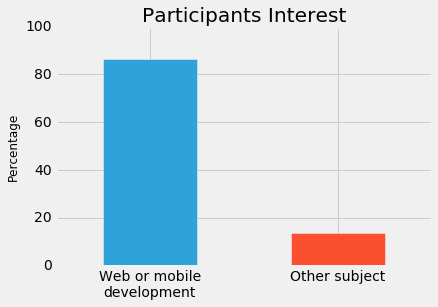

In [7]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('fivethirtyeight')


freq_table.plot.bar(rot=0)
plt.title('Participants Interest')
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0)
plt.ylim([0,100])

plt.show()

86% of the survey participants are interested in web of movile development, so we can conclude that the survey sample in representative of our customers population.

### Finding where the coders live

In this next step, we wil analyse the countries where most people live (we will consider the country our markets). Before analysing, we will drop the rows where the participants didn't answer what role they are interested in.

In [8]:
fcc_good['CountryLive'].value_counts().head(20)*100

NameError: name 'fcc_good' is not defined

In [9]:
fcc_good = fcc[fcc['JobRoleInterest'].notnull()]
fcc_good['CountryLive'].value_counts(normalize=True).head(20)*100

United States of America         45.700497
India                             7.721556
United Kingdom                    4.606610
Canada                            3.802281
Poland                            1.915765
Brazil                            1.886517
Germany                           1.828020
Australia                         1.637906
Russia                            1.491664
Ukraine                           1.301550
Nigeria                           1.228429
Spain                             1.126060
France                            1.096812
Romania                           1.038315
Netherlands (Holland, Europe)     0.950570
Italy                             0.906698
Philippines                       0.760456
Serbia                            0.760456
Greece                            0.672711
Ireland                           0.628839
Name: CountryLive, dtype: float64

Analysing the top 20 countries, we can see that majority of people live in the USA, followed by India, United Kingdom, Canada, Poland and Brazil. If we chose to stop the analysis here, we would recommend investing in USA and India, but we will analyse the data in more depth.

For the next step, we will focus on 4 countries: the USA, India, the United Kingdom and Canada. We will chose this 4 countries because they have the biggest sample and because each one has English as the primary language (the language of our courses and advertisings)

### Analysing the Money Available for Learning

In this step, we will analyse how many money each student has available per month (the company sells subscriptions at a price of $59 per month).

This will be calculated by dividing the MoneyForLearning column (that shows the total money spent since beginning to learn how to code) by the MonthsProgramming columns (the answers 0 in this column will be changed for 1).

This results will be grouped by countries.

In [36]:
fcc_good['MonthsProgramming'].replace(0,1, inplace = True)

fcc_good['money_per_month'] = fcc_good['MoneyForLearning'] / fcc_good['MonthsProgramming']
fcc_good['money_per_month'].isnull().sum()

675

In [37]:
fcc_good = fcc_good[fcc_good['money_per_month'].notnull()]
fcc_good = fcc_good[fcc_good['CountryLive'].notnull()]

In [59]:
fcc_good['CountryLive'].value_counts().head(4)

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Name: CountryLive, dtype: int64

Even after removing the rows with money null, we still have a good amount of data for the four countries.

In [53]:
countries_mean = fcc_good.groupby('CountryLive').mean()
countries_mean['money_per_month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

This results looks a bit off, because the money_per_month for Canada and specially for United Kingdom look a bit low compared to India (using the GPD per capita of each country as a parameter). We will look for outliers to see if they distort the results.

### Dealing with outliers

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


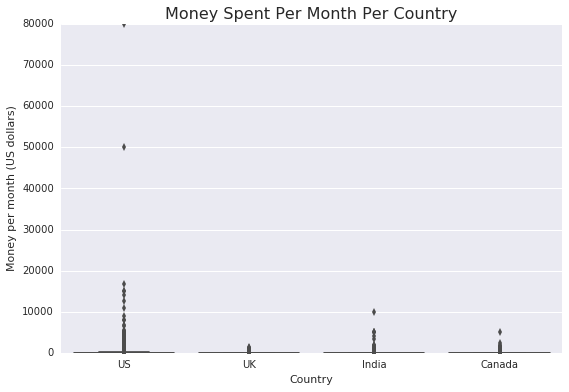

In [71]:
isolated_4 = fcc_good[fcc_good['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

import seaborn as sns
sns.boxplot(y = 'money_per_month', x = 'CountryLive', data = isolated_4)
plt.title('Money Spent Per Month Per Country',fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()

It appears there is two outliers in US, with more than 50,000 dollars per month. We will remove those data and analyse the boxplot again.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


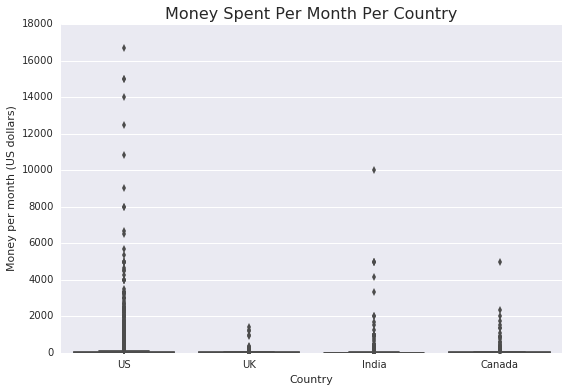

In [74]:
fcc_good = fcc_good[fcc_good['money_per_month'] < 20000]
isolated_4 = fcc_good[fcc_good['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

sns.boxplot(y = 'money_per_month', x = 'CountryLive', data = isolated_4)
plt.title('Money Spent Per Month Per Country',fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()

Looking at this data, it appears that are some outliers for India (above 2,500 spent per month), for US (above 6,000 per month) and for Canada (above 4,000). We will look those points in detail to see if they attended bootcamps (that usually have a larger cost than online courses). If they participated, we will leave the points; if not we will remove the data. 

In [85]:
india = isolated_4[isolated_4['CountryLive'] == "India"]
india_outlier = india[india['money_per_month'] > 2500]
india_outlier[['AttendedBootcamp', 'MonthsProgramming']]

,AttendedBootcamp,MonthsProgramming
1728,0.0,4.0
1755,0.0,15.0
7989,0.0,1.0
8126,0.0,1.0
13398,0.0,2.0
15587,0.0,24.0


None of those participants took part in Bootcamps (which are more expensive), so it appears strange that they spent so much money in online courses. Also, two of them has been learning for just 1 month (and other for 1 month), so maybe those had bought a bootcamp that last several months but had not finished it yet. 

We will remove those rows from the dataset.

In [88]:
isolated_4 = isolated_4.drop(india_outlier.index)

In [89]:
us = isolated_4[isolated_4['CountryLive'] == "United States of America"]
us_outlier = us[us['money_per_month'] > 6000]
us_outlier[['AttendedBootcamp', 'MonthsProgramming']]

,AttendedBootcamp,MonthsProgramming
718,1.0,1.0
1222,1.0,2.0
3184,1.0,1.0
3930,0.0,6.0
6805,1.0,1.0
7198,0.0,5.0
7505,1.0,3.0
9778,1.0,1.0
16650,0.0,12.0
16997,0.0,1.0


Some of those respondent had not attended Bootcamps, so we will remove them. Also, some of those who attended bootcamps had less than 3 months of study. This probably is not time enough to finish the bootcamps (probably they paid for a several months bootcamp but didn't finished at the time of the survey), so we will remove this rows so the money_per_month is not distorted.

In [92]:
no_bootcamp = us_outlier[us_outlier['AttendedBootcamp'] == 0]
isolated_4 = isolated_4.drop(no_bootcamp.index)

In [99]:
us = isolated_4[isolated_4['CountryLive'] == "United States of America"]
us_outlier = us[us['money_per_month'] > 6000]
less_than_3_months = us_outlier[us_outlier["MonthsProgramming"] <= 3]
isolated_4 = isolated_4.drop(less_than_3_months.index)

In [101]:
canada = isolated_4[isolated_4['CountryLive'] == "Canada"]
canada_outlier = canada[canada['money_per_month'] > 4000]
canada_outlier[['AttendedBootcamp', 'MonthsProgramming']]

,AttendedBootcamp,MonthsProgramming
13659,1.0,2.0


There's only one outlier for Canada and he participated in a Bootcamp but he have been programming for only 2 months which distort the mean. We will remove this row from the dataset.

In [102]:
isolated_4 = isolated_4.drop(canada_outlier.index)

### Selecting the best markets to advertise

In [104]:
countries_mean = isolated_4.groupby('CountryLive').mean()
countries_mean['money_per_month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    142.654608
India                        65.758763
United Kingdom               45.534443
Canada                       93.065400
Name: money_per_month, dtype: float64

In [107]:
isolated_4['CountryLive'].value_counts(normalize=True)*100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

After removing the outliers, it is clear that the best country to advertise in the USA, because they have the most representation on the survey and the most average money spent per month.

The second market to advertise is kind of tricky: we could choose Canada because the higher average money spent per month or India because they have almost double the size of Canada (both countries have a mean spent higher than $59).

Our suggestion would be to spend more in the US (like 70 % of the budget), because it's a better market and to spent the rest of the money in Canada or India (or spend 15% in each one). We recommend showing the data to the marketing department and let them use their domain knowledge to decide.